#1. Cargando y salvando Trayectorias

In [2]:
import mdtraj as md
trajectory = "/Users/alsalas/GDrive/scFv_MICA/scFv_NAMD/scfv_wb_ions.dm-01.dcd"
topology   = "/Users/alsalas/GDrive/scFv_MICA/scFv_NAMD/scfv_wb_ions.pdb"
t = md.load_dcd(trajectory, top=topology)

OSError: No such file: /Users/alsalas/GDrive/scFv_MICA/scFv_NAMD/scfv_wb_ions.pdb

In [9]:
# lets take a look at the first ten frames
print t[1:10]
# or maybe the last frame?
print t[-1]

<mdtraj.Trajectory with 9 frames, 35444 atoms, 10801 residues, and unitcells>
<mdtraj.Trajectory with 1 frames, 35444 atoms, 10801 residues, and unitcells>


In [12]:
import numpy as np
print t.xyz.shape
print np.mean(t.xyz)

(1000, 35444, 3)
0.200531


In [13]:
#the simulation time (in picoseconds) of th first 10 frames
print t.time[0:10]

[0 1 2 3 4 5 6 7 8 9]


In [15]:
# or the unitcell lengths in the last frame? (in nanometers of course)
t.unitcell_lengths[-1]

array([ 7.61409712,  5.80679417,  7.89246511], dtype=float32)

###1.2. Se puede guardar la trayectoria en varios formatos.
t.save, t.save_amberrst7, t.save_dcd (NAMD), t.save_dtr, t.save_gro, t.save_hdf5 (MDTraj), t.save_lammpstrj (LAMMMPS)
t.save_lh5 (MSMBuilder2), t.save_mdcrd, t.save_netcdf (AMBER), t.save_netcdfrst, t.save_pdb, t.save_trr (GROMACS), t.save_xtc (GROMACS), t.save_xyz

In [103]:
# the hdf5 format stores the topology inside the file for convenience
t[::2].save('halftraj.h5')

# the format will be parsed based on the extension, or you can call the
# format-specific save methods
t[0:10].save_dcd('first-ten-frames.dcd')

The trajectory contains a reference to a topology object, which can come in handy. For example, if you want to save a copy of your trajectory with only alpha carbons present, you can do that pretty easily.

In [28]:
atoms_to_keep = [a.index for a in t.topology.atoms if a.name == 'CA']
t.atom_slice(atoms_to_keep)  # this acts inplace on the trajectory
t[::2].save('CA-only.h5')

#2. Selecciones

In [29]:
from __future__ import print_function
import mdtraj as md

traj = md.load('CA-only.h5')
print(traj)

<mdtraj.Trajectory with 500 frames, 35444 atoms, 10801 residues, and unitcells>


In [30]:
print('How many atoms?    %s' % traj.n_atoms)
print('How many residues? %s' % traj.n_residues)

How many atoms?    35444
How many residues? 10801


In [31]:
frame_idx = 4 # zero indexed frame number
atom_idx = 9 # zero indexed atom index
print('Where is the fifth atom at the tenth frame?')
print('x: %s\ty: %s\tz: %s' % tuple(traj.xyz[frame_idx, atom_idx,:]))

Where is the fifth atom at the tenth frame?
x: 0.284281	y: 0.232396	z: 2.25532


In [33]:
topology = traj.topology
print(topology)

<mdtraj.Topology with 3 chains, 10801 residues, 35444 atoms, 24949 bonds>


In [34]:
print('Fifth atom: %s' % topology.atom(4))
print('All atoms: %s' % [atom for atom in topology.atoms])

Fifth atom: GLU1-CA
All atoms: [GLU1-N, GLU1-H, GLU1-H2, GLU1-H3, GLU1-CA, GLU1-HA, GLU1-CB, GLU1-HB3, GLU1-HB2, GLU1-CG, GLU1-HG3, GLU1-HG2, GLU1-CD, GLU1-OE1, GLU1-OE2, GLU1-C, GLU1-O, PHE2-N, PHE2-H, PHE2-CA, PHE2-HA, PHE2-CB, PHE2-HB3, PHE2-HB2, PHE2-CG, PHE2-CD1, PHE2-HD1, PHE2-CE1, PHE2-HE1, PHE2-CZ, PHE2-HZ, PHE2-CD2, PHE2-HD2, PHE2-CE2, PHE2-HE2, PHE2-C, PHE2-O, GLY3-N, GLY3-H, GLY3-CA, GLY3-HA3, GLY3-HA2, GLY3-C, GLY3-O, VAL4-N, VAL4-H, VAL4-CA, VAL4-HA, VAL4-CB, VAL4-HB, VAL4-CG1, VAL4-HG11, VAL4-HG12, VAL4-HG13, VAL4-CG2, VAL4-HG21, VAL4-HG22, VAL4-HG23, VAL4-C, VAL4-O, VAL5-N, VAL5-H, VAL5-CA, VAL5-HA, VAL5-CB, VAL5-HB, VAL5-CG1, VAL5-HG11, VAL5-HG12, VAL5-HG13, VAL5-CG2, VAL5-HG21, VAL5-HG22, VAL5-HG23, VAL5-C, VAL5-O, MET6-N, MET6-H, MET6-CA, MET6-HA, MET6-CB, MET6-HB3, MET6-HB2, MET6-CG, MET6-HG3, MET6-HG2, MET6-SD, MET6-CE, MET6-HE1, MET6-HE2, MET6-HE3, MET6-C, MET6-O, THR7-N, THR7-H, THR7-CA, THR7-HA, THR7-CB, THR7-HB, THR7-OG1, THR7-HG1, THR7-CG2, THR7-HG21, THR7-HG22

In [35]:
print('Second residue: %s' % traj.topology.residue(1))
print('All residues: %s' % [residue for residue in traj.topology.residues])

Second residue: PHE2
All residues: [GLU1, PHE2, GLY3, VAL4, VAL5, MET6, THR7, GLN8, SER9, PRO10, ASP11, PHE12, GLN13, SER14, VAL15, THR16, PRO17, LYS18, GLU19, LYS20, VAL21, THR22, ILE23, THR24, CYS25, ARG26, ALA27, SER28, GLN29, SER30, ILE31, GLY32, ARG33, SER34, ILE35, HIS36, TRP37, TYR38, GLN39, GLN40, LYS41, PRO42, ASP43, GLN44, SER45, PRO46, LYS47, LEU48, LEU49, ILE50, MET51, TYR52, ALA53, SER54, GLN55, SER56, PHE57, SER58, GLY59, VAL60, PRO61, SER62, ARG63, PHE64, SER65, GLY66, SER67, GLY68, SER69, GLY70, THR71, ASP72, PHE73, THR74, LEU75, THR76, ILE77, ASN78, SER79, LEU80, GLU81, ALA82, GLU83, ASP84, ALA85, ALA86, THR87, TYR88, TYR89, CYS90, HIS91, GLN92, SER93, TYR94, SER95, VAL96, PRO97, ARG98, SER99, PHE100, GLY101, GLY102, GLY103, THR104, LYS105, LEU106, GLU107, ILE108, LYS109, ARG110, THR111, VAL112, ALA113, ALA114, GLY115, GLY116, SER117, SER118, ARG119, SER120, SER121, SER122, GLY123, GLY124, GLY125, GLY126, SER127, GLY128, GLY129, GLY130, GLY131, GLN132, VAL133, GLN134, 

In [36]:
atom = topology.atom(10)
print('''Hi! I am the %sth atom, and my name is %s. 
I am a %s atom with %s bonds. 
I am part of an %s residue.''' % ( atom.index, atom.name, atom.element.name, atom.n_bonds, atom.residue.name))

Hi! I am the 10th atom, and my name is HG3. 
I am a hydrogen atom with 1 bonds. 
I am part of an GLU residue.


In [37]:
print([atom.index for atom in topology.atoms if atom.element.symbol is 'C' and atom.is_sidechain])

[6, 9, 12, 21, 24, 25, 27, 29, 31, 33, 48, 50, 54, 64, 66, 70, 80, 83, 87, 97, 101, 111, 114, 117, 128, 136, 141, 144, 153, 156, 165, 168, 169, 171, 173, 175, 177, 185, 188, 191, 202, 213, 215, 219, 229, 233, 240, 245, 248, 257, 260, 263, 266, 279, 282, 285, 294, 297, 300, 303, 316, 318, 322, 332, 336, 346, 348, 352, 355, 365, 369, 379, 390, 393, 396, 401, 414, 424, 435, 438, 441, 452, 463, 465, 469, 472, 489, 492, 495, 500, 513, 524, 526, 530, 533, 543, 547, 548, 552, 560, 563, 564, 568, 569, 570, 572, 574, 576, 584, 587, 588, 590, 592, 595, 597, 605, 608, 611, 622, 625, 628, 639, 642, 645, 648, 658, 663, 666, 675, 678, 687, 690, 693, 704, 712, 717, 720, 729, 732, 735, 738, 751, 754, 756, 760, 770, 773, 775, 779, 789, 791, 795, 798, 808, 811, 815, 825, 828, 829, 831, 833, 836, 838, 846, 856, 867, 870, 873, 884, 895, 898, 899, 901, 903, 905, 907, 915, 933, 935, 939, 946, 951, 954, 963, 974, 977, 980, 985, 998, 1001, 1002, 1004, 1006, 1008, 1010, 1018, 1036, 1054, 1072, 1076, 1086, 1089

In [38]:
print([residue for residue in topology.chain(0).residues if residue.index % 2 == 0])

[GLU1, GLY3, VAL5, THR7, SER9, ASP11, GLN13, VAL15, PRO17, GLU19, VAL21, ILE23, CYS25, ALA27, GLN29, ILE31, ARG33, ILE35, TRP37, GLN39, LYS41, ASP43, SER45, LYS47, LEU49, MET51, ALA53, GLN55, PHE57, GLY59, PRO61, ARG63, SER65, SER67, SER69, THR71, PHE73, LEU75, ILE77, SER79, GLU81, GLU83, ALA85, THR87, TYR89, HIS91, SER93, SER95, PRO97, SER99, GLY101, GLY103, LYS105, GLU107, LYS109, THR111, ALA113, GLY115, SER117, ARG119, SER121, GLY123, GLY125, SER127, GLY129, GLY131, VAL133, LEU135, GLU137, GLY139, GLY141, VAL143, PRO145, GLN147, LEU149, LEU151, CYS153, VAL155, GLY157, SER159, ARG161, ALA163, SER165, TRP167, TRP169, ARG171, PRO173, GLY175, GLY177, GLU179, ILE181, GLY183, HIS185, ASN187, ASN189, TYR191, ASN193, SER195, MET197, ARG199, THR201, SER203, ASP205, SER207, ASN209, PHE211, LEU213, LEU215, SER217, THR219, ALA221, THR223, VAL225, PHE227, ALA229, GLU231, VAL233, SER235, SER237, SER239, ASP241, TRP243, GLN245, ARG247, VAL249, VAL251, SER253, SER255, LYS257, PRO259, VAL261, SER263

In [39]:
print(topology.select('resid 1 to 2'))

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43]


In [40]:
print(topology.select('name N and backbone'))

[   0   17   37   44   60   76   93  107  124  135  149  161  181  198  209
  225  239  253  275  290  312  328  342  361  375  386  410  420  431  448
  459  478  485  509  520  539  556  580  601  618  635  657  671  683  700
  711  725  747  766  785  804  821  842  852  863  880  891  911  922  929
  945  959  970  994 1014 1025 1032 1043 1050 1061 1068 1082 1094 1114 1128
 1147 1161 1180 1194 1205 1224 1239 1249 1264 1276 1286 1296 1310 1331 1352
 1363 1380 1397 1408 1429 1440 1456 1470 1494 1505 1525 1532 1539 1546 1560
 1582 1601 1616 1635 1657 1681 1695 1711 1721 1731 1738 1745 1756 1767 1791
 1802 1813 1824 1831 1838 1845 1852 1863 1870 1877 1884 1891 1908 1924 1941
 1960 1977 1992 2003 2010 2024 2031 2050 2066 2088 2102 2113 2130 2144 2163
 2174 2193 2207 2218 2232 2248 2259 2266 2278 2289 2305 2329 2340 2350 2371
 2382 2393 2417 2431 2455 2474 2498 2515 2529 2543 2550 2572 2579 2598 2613
 2637 2656 2663 2670 2689 2706 2720 2734 2741 2755 2769 2790 2811 2825 2839
 2850 2869 2

#3. Buscando centroides
In this example, we're going to find a "centroid" (representitive structure) for a group of conformations. This group might potentially come from clustering, using method like Ward hierarchical clustering.
Note that there are many possible ways to define the centroids. This is just one.

In [41]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np

In [42]:
atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)

In [ ]:
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

In [ ]:
centroid = traj[index]
print(centroid)

#4. Agrupamiento con RMSD

In [43]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy

In [44]:
file_traj = "/Users/alsalas/GIT/mdtraj/examples/ala2.h5"
traj = md.load(file_traj)

In this example, we cluster our alanine dipeptide trajectory using the RMSD distance metric and Ward's method.
* http://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions
* http://en.wikipedia.org/wiki/Ward's_method

In [45]:
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 0.188493 nm


In [46]:
linkage = scipy.cluster.hierarchy.ward(distances)

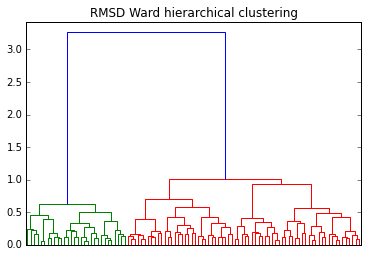

In [47]:
plt.title('RMSD Ward hierarchical clustering')
scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')
None

#5. Baker-Hubbard Hydrogen Bond Identification
md.baker_hubbard idenfies hydrogen bonds baced on cutoffs for the Donor-H...Acceptor distance and angle. The criterion employed is θ>120 and rH...Acceptor<2.5A in at least 10% of the trajectory. The return value is a list of the indices of the atoms (donor, h, acceptor) that satisfy this criteria.

In [48]:
t = md.load_pdb('http://www.rcsb.org/pdb/files/2EQQ.pdb')
print(t)

<mdtraj.Trajectory with 20 frames, 423 atoms, 28 residues, and unitcells>


In [49]:
hbonds = md.baker_hubbard(t, periodic=False)
label = lambda hbond : '%s -- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

GLU1-N -- GLU1-OE2
GLU1-N -- GLU1-OE1
GLY6-N -- SER4-O
CYS7-N -- GLY5-O
TYR11-N -- VAL8-O
MET12-N -- LYS20-O
ARG13-NH1 -- TYR11-O
THR14-N -- ARG18-O
ASP16-N -- ASP16-OD1
GLY17-N -- THR14-O
ARG18-N -- THR14-OG1
ARG18-NE -- ASP16-OD2
LYS20-N -- MET12-O
THR22-N -- GLY10-O
THR14-OG1 -- ASP16-OD1
THR28-OG1 -- ILE27-O


In [50]:
da_distances = md.compute_distances(t, hbonds[:, [0,2]], periodic=False)

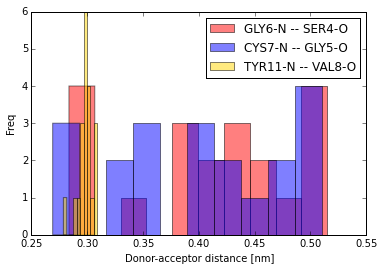

In [54]:
import itertools
color = itertools.cycle(['r', 'b', 'gold'])
for i in [2,3,4]:
    plt.hist(da_distances[:, i], color=next(color), label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq');
plt.xlabel('Donor-acceptor distance [nm]')

#6. Computing native contacts with MDTraj

Using the definition from Best, Hummer, and Eaton, "Native contacts determine protein folding mechanisms in atomistic simulations" PNAS (2013) 10.1073/pnas.1311599110

In [56]:
import numpy as np
import mdtraj as md
from itertools import combinations

def best_hummer_q(traj, native):
    """Compute the fraction of native contacts according the definition from
    Best, Hummer and Eaton [1]
    
    Parameters
    ----------
    traj : md.Trajectory
        The trajectory to do the computation for
    native : md.Trajectory
        The 'native state'. This can be an entire trajecory, or just a single frame.
        Only the first conformation is used
        
    Returns
    -------
    q : np.array, shape=(len(traj),)
        The fraction of native contacts in each frame of `traj`
        
    References
    ----------
    ..[1] Best, Hummer, and Eaton, "Native contacts determine protein folding
          mechanisms in atomistic simulations" PNAS (2013)
    """
    
    BETA_CONST = 50  # 1/nm
    LAMBDA_CONST = 1.8
    NATIVE_CUTOFF = 0.45  # nanometers
    
    # get the indices of all of the heavy atoms
    heavy = native.topology.select_atom_indices('heavy')
    # get the pairs of heavy atoms which are farther than 3
    # residues apart
    heavy_pairs = np.array(
        [(i,j) for (i,j) in combinations(heavy, 2)
            if abs(native.topology.atom(i).residue.index - \
                   native.topology.atom(j).residue.index) > 3])
    
    # compute the distances between these pairs in the native state
    heavy_pairs_distances = md.compute_distances(native[0], heavy_pairs)[0]
    # and get the pairs s.t. the distance is less than NATIVE_CUTOFF
    native_contacts = heavy_pairs[heavy_pairs_distances < NATIVE_CUTOFF]
    print("Number of native contacts", len(native_contacts))
    
    # now compute these distances for the whole trajectory
    r = md.compute_distances(traj, native_contacts)
    # and recompute them for just the native state
    r0 = md.compute_distances(native[0], native_contacts)
    
    q = np.mean(1.0 / (1 + np.exp(BETA_CONST * (r - LAMBDA_CONST * r0))), axis=1)
    return q  

In [70]:
# pull a random protein from the PDB
traj = md.load_pdb('http://www.rcsb.org/pdb/files/2MI7.pdb')
# the unitcell info in this PDB happens to be wrong, so lets
# just remove it
traj.unitcell_vectors = None

# just for example, use the first frame as the 'native' conformation
q = best_hummer_q(traj, traj[0])

Number of native contacts 526


In [71]:
q

array([ 0.99999928,  0.94806987,  0.96039933,  0.94683045,  0.96367395,
        0.95069194,  0.96071482,  0.95701742,  0.96633339,  0.95121229,
        0.96040708,  0.97090465,  0.96183681,  0.96435791,  0.96465486,
        0.96378207,  0.96242231,  0.95903844,  0.95070308,  0.97412437,
        0.95635539,  0.96414095,  0.96780968,  0.95897508,  0.96484989,
        0.97376984,  0.94492197,  0.9412111 ,  0.98080039,  0.9632982 ,
        0.96959299,  0.96448916], dtype=float32)

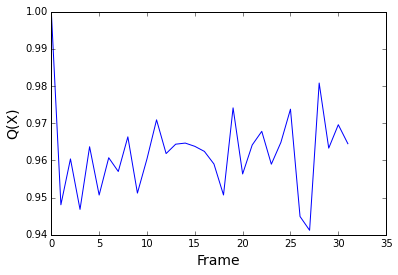

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(q)
plt.xlabel('Frame', fontsize=14)
plt.ylabel('Q(X)', fontsize=14)
plt.show()

#7. PCA.

In [73]:
from __future__ import print_function
import mdtraj as md
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [74]:
file_traj = "/Users/alsalas/GIT/mdtraj/examples/ala2.h5"
traj = md.load(file_traj)

Create a two component PCA model, and project our data down into this reduced dimensional space. Using just the cartesian coordinates as input to PCA, it's important to start with some kind of alignment.

In [75]:
pca1 = PCA(n_components=2)
traj.superpose(traj, 0)

<mdtraj.Trajectory with 100 frames, 22 atoms, 3 residues, without unitcells at 0x1273c00d0>

In [76]:
reduced_cartesian = pca1.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
print(reduced_cartesian.shape)

(100, 2)


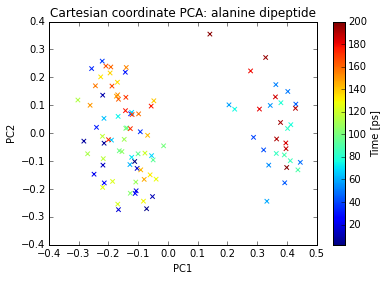

In [77]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=traj.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA: alanine dipeptide')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

 Lets try cross-checking our result by using a different feature space that isn't sensitive to alignment, and instead to "featurize" our trajectory by computing the pairwise distance between every atom in each frame, and using that as our high dimensional input space for PCA.

In [78]:
pca2 = PCA(n_components=2)

from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(traj.n_atoms), 2))
pairwise_distances = md.geometry.compute_distances(traj, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)

(100, 231)


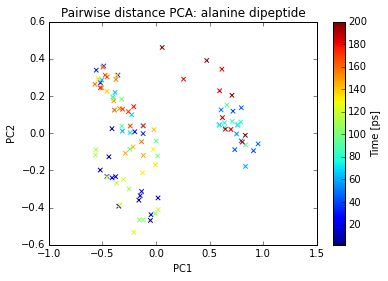

In [79]:
plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='x', c=traj.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA: alanine dipeptide')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

#8. Ramachandran

In [80]:
from __future__ import print_function
import mdtraj as md

In [82]:
file_traj = "/Users/alsalas/GIT/mdtraj/examples/ala2.h5"
traj = md.load(file_traj)
atoms, bonds = traj.topology.to_dataframe()

In [83]:
psi_indices, phi_indices = [6, 8, 14, 16], [4, 6, 8, 14]
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])

(-3.141592653589793, 3.141592653589793)

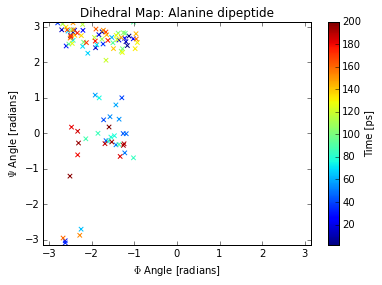

In [84]:
from pylab import *
from math import pi

figure()
title('Dihedral Map: Alanine dipeptide')
scatter(angles[:, 0], angles[:, 1], marker='x', c=traj.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)

#9. Solvent Sccessible Surface Area (SASA) Calculation

In [85]:
from __future__ import print_function
import numpy as np
import mdtraj as md

In [86]:
file_traj = "/Users/alsalas/GIT/mdtraj/examples/ala2.h5"
traj = md.load(file_traj)

In [90]:
sasa = md.shrake_rupley(traj)
print(traj)
print('sasa data shape', sasa.shape)

<mdtraj.Trajectory with 100 frames, 22 atoms, 3 residues, without unitcells>
sasa data shape (100, 22)


In [94]:
total_sasa = sasa.sum(axis=1)
print(total_sasa.shape)

(100,)


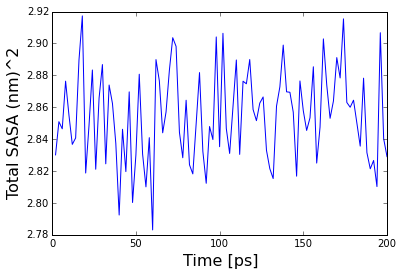

In [95]:
from matplotlib.pylab import *
plot(traj.time, total_sasa)
xlabel('Time [ps]', size=16)
ylabel('Total SASA (nm)^2', size=16)
show()

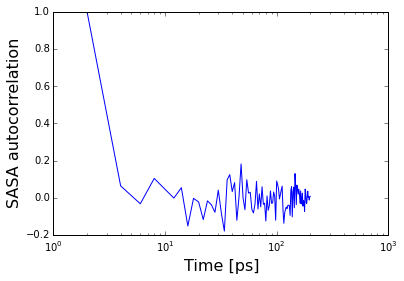

In [97]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

semilogx(traj.time, autocorr(total_sasa))
xlabel('Time [ps]', size=16)
ylabel('SASA autocorrelation', size=16)
show()

#10. Distancia entre átomos

In [105]:
# calculating the average distance between two atoms
import mdtraj as md
import numpy as np
file_traj = "/Users/alsalas/GIT/mdtraj/examples/ala2.h5"
t = md.load(file_traj)
np.mean(np.sqrt(np.sum((t.xyz[:, 0, :] - t.xyz[:, 21, :])**2, axis=1)))

0.7225529

#10. Ver Trayectoria

In [99]:
from mdtraj.html import TrajectoryView, enable_notebook
enable_notebook()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
file_traj = "/Users/alsalas/GIT/mdtraj/examples/ala2.h5"
traj = md.load(file_traj)

In [102]:
#TrajectoryView(traj)